## Importing the Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Look at the data

Notice that we have missing values and "noise" (for example, some client names have .,*, some are upper case, duplicates etc)

In [48]:
df = pd.read_csv("./data_to_be_cleaned.csv")

df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold


In [49]:
# check number of observations and non null values:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        40 non-null     int64  
 1   Client               38 non-null     object 
 2   Beneficiary          40 non-null     object 
 3   AmountUSD            38 non-null     float64
 4   TransactionDateTime  40 non-null     object 
 5   ClientTier           37 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ KB


## Issue No.1 : Null Client names

Since we don't have enough data, we can't tell who's the client in TransactionID 15 for example.
We'll take car of it.

In [50]:
cleaned_df = df.copy()

cleaned_df.dropna(subset=['Client'], inplace=True)

cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold


## Issue No.2 : Duplicates

For example, TransactionID numbers 3 and 4. You can see the everything but the ID is the same in those records. So we'll specify in the 'subset' that everything but ID should be the same to be considered as a suplicate.

In [51]:
cleaned_df.drop_duplicates(subset=["Client","Beneficiary","AmountUSD",
                                   "TransactionDateTime","ClientTier"], inplace=True)

cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold
10,11,Tony Stark,Peter Parker,320.50,2024-06-01 12:39,Gold


## Issue No.3 : Uneven Characters

For example TransactionID 2 with the <>.

Because of the complexity (we can't guess what are the uneven chars in all records) we'll use the rejection method in order to clean it. 


In [52]:
# we'll replace all small chars a-z, all upper chars A-Z, all numbers 0-9 and spaces ' '
# with empty spaces in order to get a all the uneeven chars

cleaned_df['Client'].str.replace('[a-zA-Z0-9 ]', '', regex=True).unique()

# regex = earase all the mentioned
# unique will give us the unique uneven values


array(['', '<>', '.', '*', '--'], dtype=object)

In [53]:
# Remove them and replace

cleaned_df['Client'] = cleaned_df['Client'].str.strip("<>.*- ") # strip removes the outer chars
cleaned_df['Client'] = cleaned_df['Client'].str.replace("*"," ") # strip removes the inner chars (ID.6)

cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,Frodo Baggins,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold
10,11,Tony Stark,Peter Parker,320.50,2024-06-01 12:39,Gold


In [54]:
# we'll make everything needed in upper case

upper_lst = ['Client','Beneficiary']

for col in upper_lst:
    cleaned_df[col]= cleaned_df[col].str.upper()

cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,NaN,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRY POTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold


## Issue No.4 : Cleaning Numeric Data

In order to not lose important data here, we'll use the mean or median to replace the null values.
If we want to go more pro, we can even use a ML model to predict the missing values.

In order to know if we should use the mean or median, we'll plot the histogram

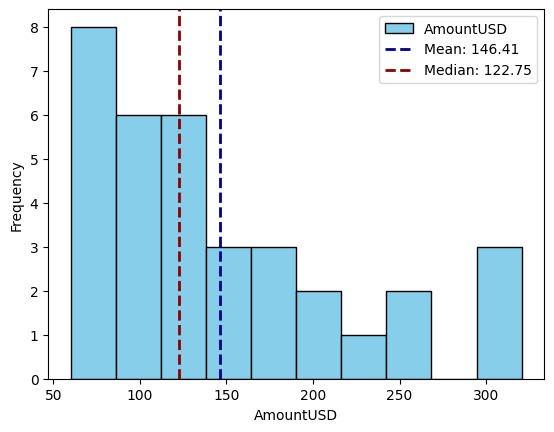

In [57]:
mean_value = cleaned_df["AmountUSD"].mean()
median_value = cleaned_df["AmountUSD"].median()

ax = cleaned_df['AmountUSD'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
ax.set_ylabel('Frequency')
ax.set_xlabel('AmountUSD')

ax.axvline(mean_value, color='darkblue', linestyle='dashed', linewidth=2, 
           label=f'Mean: {mean_value:.2f}')
ax.axvline(median_value, color='darkred', linestyle='dashed', linewidth=2, 
           label=f'Median: {median_value:.2f}')

ax.legend()

plt.show()

# as you can see, it's little bit left skewed.

When we replace the null values we introduce errors to our data.
We'll check the errors of each to decide which value (mean/median) has the smaller error in our data.

In [60]:
# using numpy we'll take the average to the distances between the values and mean
avg_error = np.mean(np.abs(cleaned_df['AmountUSD']-mean_value))
print(f"The average error of replaceing null with mean is {round(avg_error,2)} $")

The average error of replaceing null with mean is 59.06 $


In [65]:
# using numpy we'll take the average to the distances between the values and median
avg_error2 = np.mean(np.abs(cleaned_df['AmountUSD']-median_value))
print(f"The average error of replaceing null with median is {round(avg_error2,2)} $")

The average error of replaceing null with median is 55.79 $


Choosing the min error:

In [67]:
if avg_error2< avg_error:
    print('Choose the Median')
else:
    print('Choose the Mean')

Choose the Mean


Replacing the Null values with the Mean. We'll need to use a dictionary for that.

In [70]:
cleaned_df.fillna({"AmountUSD": median_value},inplace=True)

cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,122.75,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRY POTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold


## Issue No.5 : Imputing Categorical Values

In ClientTier, we;ll replace the null with the most frequent value.

In order to know which category should we use, we'll plot the histogram

In [78]:
# first we'll check if we need to clean the column
cleaned_df['ClientTier'].str.replace('[a-zA-Z0-9 ]', '', regex=True).unique()


array(['', nan], dtype=object)

In [83]:
# we got a space so we'll strip it

cleaned_df['ClientTier']= cleaned_df['ClientTier'].str.strip()
cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,122.75,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRY POTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold


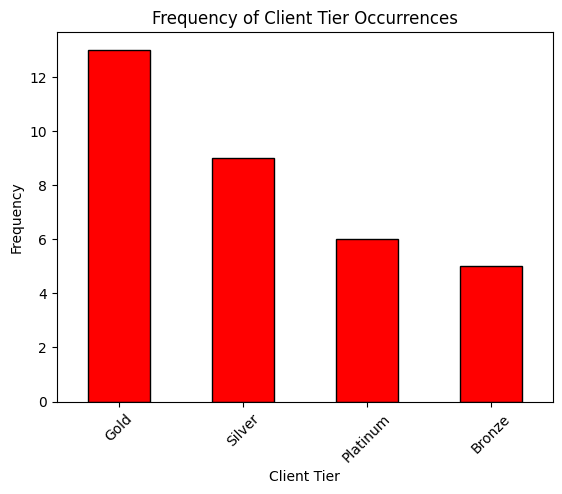

ClientTier
Gold        13
Silver       9
Platinum     6
Bronze       5
Name: count, dtype: int64

In [84]:
tier_counts = cleaned_df['ClientTier'].value_counts()

# plot
tier_counts.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Client Tier')
plt.ylabel('Frequency')
plt.title('Frequency of Client Tier Occurrences')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

# see the counts
tier_counts

In [85]:
# we'll make everything needed in upper case

upper_lst = ['Client','Beneficiary']

for col in upper_lst:
    cleaned_df[col]= cleaned_df[col].str.upper()

cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,122.75,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRY POTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold


In [86]:
# using the mode method
cleaned_df['ClientTier'].mode()


0    Gold
Name: ClientTier, dtype: object

In [87]:
# we'll grab the gold label from the first item ( [0] )
client_tier_mode = cleaned_df['ClientTier'].mode()[0]


We'll use the Gold. However we should remember that we introduce a lot of error.

In [89]:
cleaned_df.fillna({'ClientTier': client_tier_mode},inplace=True)

cleaned_df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,DARTH VADER,LUKE SKYWALKER,120.50,2024-06-01 12:30,Gold
1,2,FRODO BAGGINS,GANDALF THE GREY,122.75,2024-06-01 12:31,Silver
2,3,TONY STARK,BRUCE BANNER,300.40,2024-06-01 12:32,Gold
4,5,JON SNOW,DAENERYS TARGARYEN,150.75,2024-06-01 12:33,Platinum
5,6,HARRY POTTER,HERMIONE GRANGER,200.00,2024-06-01 12:34,Gold
6,7,LUKE SKYWALKER,HAN SOLO,90.00,2024-06-01 12:35,Silver
7,8,KATNISS EVERDEEN,PEETA MELLARK,120.00,2024-06-01 12:36,Bronze
8,9,MICHAEL SCOTT,DWIGHT SCHRUTE,85.00,2024-06-01 12:37,Silver
9,10,WALTER WHITE,JESSE PINKMAN,70.00,2024-06-01 12:38,Gold
10,11,TONY STARK,PETER PARKER,320.50,2024-06-01 12:39,Gold
